## 条件付き画像生成プログラム

粗い画像を条件付きの入力画像$x$として、高解像度の画像生成を行うプログラムの確認

In [1]:
!pip install torch torchvision tqdm matplotlib

  Using cached torch-2.7.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (29 kB)
  Using cached torchvision-0.22.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (6.1 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached filelock-3.18.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached fsspec-2025.3.2-py3-none-any.whl.metadata (11 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.6.77-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.6.77-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.6.80-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.5.1.17-py3-none-manylinux

低解像度の入力データの表示

torch.Size([20, 1, 28, 28])
torch.Size([20, 1, 7, 7])


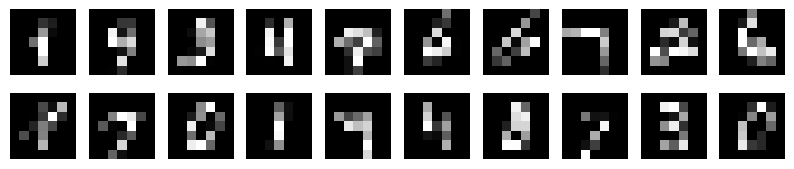

In [46]:
import math
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
import torch.nn.functional as F
from torch import nn
from tqdm import tqdm

def reverse_to_img(x):
        x = x * 255
        x = x.clamp(0, 255)
        x = x.to(torch.uint8)
        x = x.cpu()
        to_pil = transforms.ToPILImage()
        return to_pil(x)
    
def show_images(images, rows=2, cols=10):
    fig = plt.figure(figsize=(cols, rows))
    i = 0
    for r in range(rows):
        for c in range(cols):
            fig.add_subplot(rows, cols, i + 1)
            plt.imshow(images[i], cmap='gray')
            plt.axis('off')
            i += 1
    plt.show()
    
def sample(x,x_shape=(20,1, 7, 7)):#20, 1, 28, 28
    batch_size = x_shape[0]
    images = [reverse_to_img(x[i]) for i in range(batch_size)]
    return images

def resize_images(batch_vectors, original_size=28, new_size=7):
    B = batch_vectors.size(0)  # バッチサイズ

    # 1次元を28×28画像にreshape (B, 1, 28, 28)
    images = batch_vectors.view(B, 1, original_size, original_size)

    # リサイズ (B, 1, 7, 7)
    resized_images = F.interpolate(images, size=(new_size, new_size), mode='bilinear', align_corners=False)
    return resized_images

    
preprocess = transforms.ToTensor()
dataset = torchvision.datasets.MNIST(root='./data', download=True, transform=preprocess)
dataloader = DataLoader(dataset, batch_size=20, shuffle=True)

torch.set_printoptions(edgeitems=1000)

for data,label in dataloader:
    print(data.shape)
    x = resize_images(data)
    print(x.shape)
    img=sample(x)
    show_images(img)
    break